In [1]:
import scared

In [2]:
ths = scared.traces.read_ths_from_ets_file('dpa_v2.ets')

/home/sushranth/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
print(len(ths))

20000


In [17]:
trace_array = ths[:].samples[:, :]

In [18]:
print(len(trace_array))

20000


In [19]:
print(len(trace_array[0]))

3253


In [20]:
print(trace_array[0])

[-5011 -4625 -4180 ...  -354   -67   714]


In [7]:
print(ths.key)

[[  0   0   0 ... 163   8 211]
 [  0   0   0 ... 163   8 211]
 [  0   0   0 ... 163   8 211]
 ...
 [  0   0   0 ... 163   8 211]
 [  0   0   0 ... 163   8 211]
 [  0   0   0 ... 163   8 211]]


In [9]:
print(ths.plaintext)

[[  0   0   0 ... 237  42 106]
 [167 132 217 ... 108 251 229]
 [191 113  88 ... 180 218  86]
 ...
 [148 225  89 ...  36  39 108]
 [ 42  43 179 ...  18 204 238]
 [170 230  62 ... 209 181  19]]


In [38]:
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

def aes_internal(inputdata, key):
    return sbox[inputdata ^ key]

HW = [bin(n).count("1") for n in range(0, 256)]

In [11]:
assert(aes_internal(0xAB, 0xEF) == 0x1B)
assert(aes_internal(0x22, 0x01) == 0x26)
print("✔️ OK to continue!")

✔️ OK to continue!


In [39]:
def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

/home/sushranth/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


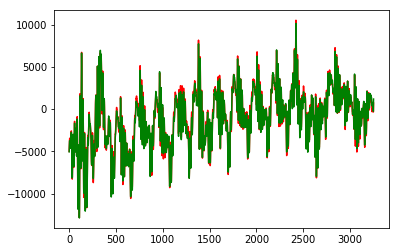

In [13]:
import matplotlib.pylab as plt

# ###################
# START SOLUTION
# ###################
plt.figure()
plt.plot(trace_array[0], 'r')
plt.plot(trace_array[1], 'g')
plt.show()

In [14]:
textin_array = ths.plaintext

In [16]:
print(textin_array[0])
print(textin_array[1])

[  0   0   0   0   0   0   0   2 183 225  81  98 138 237  42 106]
[167 132 217   4  81 144 207 239  50  78 119  56 146 108 251 229]


In [22]:
import numpy as np

In [23]:
numtraces = np.shape(trace_array)[0] #total number of traces
numpoints = np.shape(trace_array)[1] #samples per trace

In [24]:
print(numtraces,numpoints)

20000 3253


In [25]:
key=ths.key[0]

In [26]:
print(key)

[  0   0   0   0   0   0   0   3  36  63 106 136 133 163   8 211]


In [35]:
guessed_byte = 0

max_diffs = [0]*256
full_diffs = [0]*256


for guess in range(0, 256):
    
    one_list = []
    zero_list = []
    
    for trace_index in range(numtraces):
        
        #Get a hypothetical leakage list - use aes_internal(guess, input_byte)
        hypothetical_leakage = aes_internal(guess, textin_array[trace_index][guessed_byte])
    
        #Mask off the lowest bit - is it 0 or 1? Depending on that add trace to array
        if hypothetical_leakage & 0x01:        
            one_list.append(trace_array[trace_index])
        else:
            zero_list.append(trace_array[trace_index])
            
    one_avg = np.asarray(one_list).mean(axis=0)
    zero_avg = np.asarray(zero_list).mean(axis=0)
    full_diffs[guess] = abs(one_avg - zero_avg)
    max_diffs[guess] = np.max(full_diffs[guess])
    
    print("Guessing %02x: %f"%(guess, mean_diffs[guess]))

sorted_args = np.argsort(max_diffs)[::-1]



In [37]:
for i in range(256):
    print("Key Guess : %02x Value : %f"%(sorted_args[i],max_diffs[sorted_args[i]]))

Key Guess : e8 Value : 56.189871
Key Guess : b3 Value : 55.963927
Key Guess : 05 Value : 53.523154
Key Guess : ac Value : 44.964504
Key Guess : 22 Value : 41.246947
Key Guess : 82 Value : 40.922595
Key Guess : 48 Value : 40.805778
Key Guess : ca Value : 39.686831
Key Guess : 65 Value : 37.818025
Key Guess : ba Value : 37.216649
Key Guess : 08 Value : 37.073716
Key Guess : 06 Value : 36.875485
Key Guess : eb Value : 36.065801
Key Guess : da Value : 35.852892
Key Guess : 7a Value : 34.643352
Key Guess : 16 Value : 34.495075
Key Guess : f4 Value : 34.489198
Key Guess : 25 Value : 34.203982
Key Guess : 73 Value : 33.568315
Key Guess : cb Value : 33.416494
Key Guess : b4 Value : 33.305494
Key Guess : 10 Value : 33.052163
Key Guess : 6f Value : 32.323994
Key Guess : a6 Value : 31.930266
Key Guess : 6b Value : 31.877091
Key Guess : 0f Value : 31.717583
Key Guess : c6 Value : 31.330528
Key Guess : f8 Value : 31.061697
Key Guess : 07 Value : 30.528136
Key Guess : 8b Value : 30.525326
Key Guess 

In [31]:
def calculate_diffs(guess, byteindex=0, bitnum=0):
    """Perform a simple DPA on two traces, uses global `textin_array` and `trace_array` """
    
    one_list = []
    zero_list = []

    for trace_index in range(numtraces):
        hypothetical_leakage = aes_internal(guess, textin_array[trace_index][byteindex])

        #Mask off the requested bit
        if hypothetical_leakage & (1<<bitnum):
            one_list.append(trace_array[trace_index][450:650])
        else:
            zero_list.append(trace_array[trace_index][450:650])

    one_avg = np.asarray(one_list).mean(axis=0)
    zero_avg = np.asarray(zero_list).mean(axis=0)
    return abs(one_avg - zero_avg)

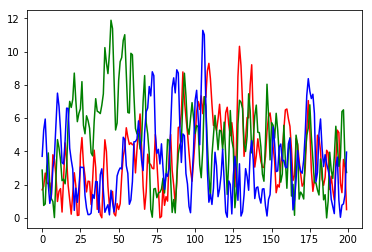

In [33]:
plt.plot(calculate_diffs(0x00), 'r')
plt.plot(calculate_diffs(0xf1), 'g')
plt.plot(calculate_diffs(0xf6), 'b')

In [34]:
from tqdm import tnrange
import numpy as np

#Store your key_guess here, compare to known_key
key_guess = []

for subkey in tnrange(0, 16, desc="Attacking Subkey"):
    # ###################
    # Add your code here
    # ###################
    #raise NotImplementedError("Add Your Code Here")
    
    # ###################
    # START SOLUTION
    # ###################
    max_diffs = [0]*256
    full_diffs = [0]*256
    for guess in range(0, 256):
        full_diff_trace = calculate_diffs(guess, subkey)
        max_diffs[guess] = np.max(full_diff_trace)
        full_diffs[guess] = full_diff_trace
        
    #Get argument sort, as each index is the actual key guess.
    sorted_args = np.argsort(max_diffs)[::-1]
    
    #Keep most likely
    key_guess.append(sorted_args[0])
    
    #Print results
    print("Subkey %2d - most likely %02X (actual %02X)"%(subkey, key_guess[subkey], key[subkey]))
    
    #Print other top guesses
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_diffs[g]))
    
    print("\n")

/home/sushranth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


Subkey  0 - most likely 05 (actual 00)
 Top 5 guesses: 
   05 - Diff = 21.786066
   48 - Diff = 20.322845
   1F - Diff = 19.754046
   3A - Diff = 19.419891
   08 - Diff = 18.901246


Subkey  1 - most likely ED (actual 00)
 Top 5 guesses: 
   ED - Diff = 17.016123
   DE - Diff = 16.909024
   81 - Diff = 16.640206
   E9 - Diff = 16.595058
   A9 - Diff = 16.589856


Subkey  2 - most likely 21 (actual 00)
 Top 5 guesses: 
   21 - Diff = 19.558012
   F8 - Diff = 19.017368
   12 - Diff = 18.854340
   64 - Diff = 16.492501
   A1 - Diff = 16.488824


Subkey  3 - most likely 6F (actual 00)
 Top 5 guesses: 
   6F - Diff = 22.247469
   54 - Diff = 19.261868
   B3 - Diff = 19.212029
   67 - Diff = 18.809797
   04 - Diff = 17.892894


Subkey  4 - most likely F3 (actual 00)
 Top 5 guesses: 
   F3 - Diff = 22.156620
   0C - Diff = 20.196677
   22 - Diff = 19.057536
   30 - Diff = 18.718957
   5A - Diff = 18.667514


Subkey  5 - most likely DE (actual 00)
 Top 5 guesses: 
   DE - Diff = 20.339494
   6

In [40]:
from tqdm import tnrange
maxcpa = [0] * 256

# we don't need to redo the mean and std dev calculations 
# for each key guess
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

for kguess in tnrange(0, 256):
    hws = np.array([[HW[aes_internal(textin[0],kguess)] for textin in textin_array]]).transpose()
    
    # ###################
    # Add your code here
    # ###################
    #raise NotImplementedError("Add your code here, and delete this.")
    
    # ###################
    # START SOLUTION
    # ###################
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[kguess] = max(abs(cpaoutput))
    

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)
# ###################
# END SOLUTION
# ###################
print("Key guess: ", hex(guess))
print("Correlation: ", guess_corr)

/home/sushranth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':



Key guess:  0xb0
Correlation:  0.03677368459977248


In [41]:
t_bar = np.sum(trace_array, axis=0)/len(trace_array)
o_t = np.sqrt(np.sum((trace_array - t_bar)**2, axis=0))

cparefs = [0] * 16 #put your key byte guess correlations here
bestguess = [0] * 16 #put your key byte guesses here

for bnum in tnrange(0, 16):
    maxcpa = [0] * 256
    for kguess in range(0, 256):
    # ###################
    # Add your code here
    # ###################
    #raise NotImplementedError("Add your code here, and delete this.")
    
    # ###################
    # START SOLUTION
    # ###################
        hws = np.array([[HW[aes_internal(textin[bnum],kguess)] for textin in textin_array]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = correlation/(o_t*o_hws)
        maxcpa[kguess] = max(abs(cpaoutput))
    bestguess[bnum] = np.argmax(maxcpa)
    cparefs[bnum] = max(maxcpa)
    # ###################
    # END SOLUTION
    # ###################

print("Best Key Guess: ", end="")
for b in bestguess: print("%02x " % b, end="")
print("\n", cparefs)

/home/sushranth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys



Best Key Guess: b0 a3 45 0c a1 41 81 64 02 8b 24 97 0c fc e9 43 
 [0.03677368459977248, 0.03278555573823046, 0.03359359197572764, 0.03663029734760345, 0.03268290031875528, 0.03496235904253384, 0.03420824039320424, 0.03592346025220081, 0.036931840026845804, 0.03750071731322957, 0.03360757561082919, 0.031997019769102464, 0.03464022808910048, 0.03203884799361719, 0.037390615029912026, 0.0304375599654914]


In [42]:
print(key)

[  0   0   0   0   0   0   0   3  36  63 106 136 133 163   8 211]
